In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from pathlib import Path

In [91]:
df = pd.read_csv("sample_1pml_1570512675146.csv")

In [9]:
dr_nums = df['DriverNumber'].unique()
dr_nums, len(dr_nums)

(array([  167007,    40634,   115905,     9044,   112742,   140155,
          166749,   181610,  5131166,    38427,    42242, 20221758,
          431122,   310746,   166991,   363407,   380055,   174279,
         2354466,  5090117,    48493, 10161648,  4002190,  6000392,
         2330449, 16029017,  5131159,   393777,  2413017,   100366,
          138238,     3265,   110015,   131563,   131341,     5787,
          390401,   100925,   101501, 20445358,     4851,     8954],
       dtype=int64), 42)

In [96]:
dr1=df[df["CompanyID"]==6]
dr1.head()

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
42,False,green,6,90,普通車,380055,35.630651,139.701645,999,61,61.0,2016-05-05 06:34:10,賃走
171,True,green,6,360,普通車,380055,35.619258,139.750792,305,61,61.0,2016-11-02 07:54:43,空車
220,False,green,6,180,普通車,393777,35.669182,139.804907,603,61,80.0,2018-03-20 23:35:06,割増
320,False,green,6,225,普通車,393777,35.644015,139.672381,603,61,80.0,2018-03-12 21:21:40,賃走
508,False,green,6,225,普通車,380055,35.619561,139.597041,1184,81,100.0,2016-12-03 19:57:58,賃走


In [45]:
df["VehicleStatus"].unique()

array(['実車', '空車', '離れ', '回送', '支払', '待機', '賃走', '迎車', '割増', '休憩', '閉局',
       '了解', '不在', '貸切', '緊急', '非常', '電障'], dtype=object)

In [46]:
for i in df["CompanyID"].unique():
    print(i)
    print(df[df["CompanyID"]==i]["VehicleStatus"].unique())

1
['実車' '空車' '回送' '支払' '待機' '迎車' '閉局' '不在' '貸切']
8
['離れ' '実車' '空車' '了解' '緊急' '貸切']
3
['実車' '空車' '休憩' '迎車' '緊急' '閉局' '回送']
9
['空車' '実車' '回送' '支払' '休憩' '迎車' '閉局']
6
['賃走' '空車' '割増' '回送' '迎車' '休憩' '支払' '閉局' '貸切']
2
['賃走' '回送' '空車' '閉局' '迎車' '支払' '休憩']
7
['空車' '実車' '支払' '回送' '迎車' '非常' '閉局' '電障' '休憩' '貸切']


In [4]:
dr=df[df["DriverNumber"]==5131159]

In [94]:
dr.head()

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
42,False,green,6,90,普通車,380055,35.630651,139.701645,999,61,61.0,2016-05-05 06:34:10,賃走
171,True,green,6,360,普通車,380055,35.619258,139.750792,305,61,61.0,2016-11-02 07:54:43,空車
220,False,green,6,180,普通車,393777,35.669182,139.804907,603,61,80.0,2018-03-20 23:35:06,割増
320,False,green,6,225,普通車,393777,35.644015,139.672381,603,61,80.0,2018-03-12 21:21:40,賃走
508,False,green,6,225,普通車,380055,35.619561,139.597041,1184,81,100.0,2016-12-03 19:57:58,賃走


In [6]:
dr_sort = dr.sort_values(by=['StatusTime'])
dr_sort["VehicleStatus"].unique()

array(['空車', '休憩', '実車', '迎車'], dtype=object)

In [7]:
a = ((dr_sort["VehicleStatus"]== "実車").values).astype(np.int)
dif1_pick = a[1:]-a[:-1]
dif1_pick = np.append(dif1_pick, 0)
dif2_pick = np.append(a[2:]-a[:-2], [0,0])
dif_pick = dif1_pick+dif2_pick
#pick up する位置
dr_sort["pick"]=(dif_pick == 2).astype(np.int)
#dr_sort
#np.count_nonzero(alist == 1), np.count_nonzero(alist == -1),np.count_nonzero(alist == 0)

In [66]:
np.unique(pick_up(dr_sort)), np.unique(take(dr_sort))

(array([-2, -1,  0,  1,  2]), array([-2, -1,  0,  1,  2]))

In [49]:
def pick_up(df):
    a = (((df["VehicleStatus"]== "実車")|(df["VehicleStatus"]== "賃走")).values).astype(np.int)
    dif1_pick = a[1:]-a[:-1]
    dif1_pick = np.append(dif1_pick, 0)
    dif2_pick = np.append(a[2:]-a[:-2], [0,0])
    dif_pick = dif1_pick+dif2_pick
    
    
    dif2_take = np.append(a[2:]-a[:-2], 0)
    dif2_take = np.append(0,dif2_take)
    dif_take = dif1_pick + dif2_take
    return dif_pick, dif_take

def take(df):
    a = ((df["VehicleStatus"]== "実車").values).astype(np.int)
    print("a", len(a))
    dif2_take = np.append(a[2:]-a[:-2], 0)
    dif2_take = np.append(0,dif2_take)
    print
    dif_take = dif1_pick + dif2_take
    return dif_take

dif2_take = np.append(a[2:]-a[:-2], 0)
dif2_take = np.append(0,dif2_take)
dif_take = dif1_pick+dif2_take
#get out する位置
#dr_sort[dif_take == -2]
dr_sort["pick"]=dr_sort["pick"]-(dif_take == -2).astype(np.int)
#dr_sort

In [50]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def dist(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c*1000
    #print("Result:", distance)
    return distance

In [ ]:
for i in []:
    dist[35.746416, 139.832615, 35.746416, 139.832615]

In [44]:
df_dist = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
df_dist

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis


In [51]:
def sum_dis(start, finish, df1):
    sum_= 0
    for i in range (start, finish):
        #print(i)
        sum_+= dist(df1.iloc[i,6],df1.iloc[i,7], 
                 df1.iloc[i+1,6],df1.iloc[i+1,7])
    return sum_

i=0
x=0
n=len(dr_sort)
while i<n:
    if dr_sort.iloc[i,13]==1:
        s = i
    elif dr_sort.iloc[i,13]==-1:
        f = i
        d = sum_dis(s,f)
        df_dist.loc[x] = [dr_sort.iloc[s, 5],dr_sort.iloc[s,11], dr_sort.iloc[f,11], 
                         dr_sort.iloc[s,6],dr_sort.iloc[s,7], 
                         dr_sort.iloc[f,6],dr_sort.iloc[f,7], d ]
        x+=1
    i+=1

def make_df(df):
    b = df
    return b

b = make_df
b

In [52]:
df_dists = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
#print(df_dist)
dr_nums = df['DriverNumber'].unique()
#dr_nums = [40634,   115905]
#dr_nums = [115905, 5131159]
    
for num in dr_nums:
    print(num)
    df_dist = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
    dr=df[df["DriverNumber"]==num]
    dr_sort = dr.sort_values(by=['StatusTime'])
    pick1, take1 = pick_up(dr_sort)
    dr_sort["pick"]= ((pick1 == 2).astype(np.int)-(take1 == -2).astype(np.int))
    i=0
    x=0
    n=len(dr_sort)
    s = 0
    while i<n:
        if dr_sort.iloc[i,13]==1:
            s = i
        elif dr_sort.iloc[i,13]==-1:
            f = i
            d = sum_dis(s,f, dr_sort)
            df_dist.loc[x] = [dr_sort.iloc[s, 5],dr_sort.iloc[s,11], dr_sort.iloc[f,11], 
                              dr_sort.iloc[s,6],dr_sort.iloc[s,7], 
                              dr_sort.iloc[f,6],dr_sort.iloc[f,7], d ]
            x+=1
        i+=1
        
    df_dists = pd.concat([df_dists,df_dist],ignore_index=True)

167007
40634
115905
9044
112742
140155
166749
181610
5131166
38427
42242
20221758
431122
310746
166991
363407
380055
174279
2354466
5090117
48493
10161648
4002190
6000392
2330449
16029017
5131159
393777
2413017
100366
138238
3265
110015
131563
131341
5787
390401
100925
101501
20445358
4851
8954


### 最初の時点で、実車になっているタクシーがあるため
dr_num	start_time	finish_time	lat1	lon1	lat2	lon2	dis  
40634	2016-12-07 14:42:13	2016-04-01 00:06:15	35.690774	139.747322	35.711846	139.776528	0
### のようなものが最初に出てくる可能性あり

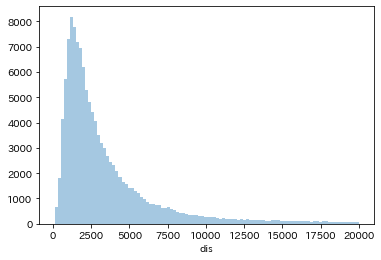

In [42]:
sns.distplot(df_dists[df_dists["dis"]<20000].loc[:, "dis"], kde=False, rug=False, bins=100) 

In [44]:
df_dists['dis'].max()

98907.01122320494

In [13]:
np.mean(df_dists["dis"]), np.var(df_dists["dis"])

(4402.299424649535, 3260869155.119257)

In [14]:
df_dists.query('dis == "14282779.26191702"')

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis
21016,140155,2016-04-22 07:08:42,2016-04-22 07:15:11,0.004602,0.01004,35.708708,139.893289,1.428278e+07


In [60]:
len(df_dists["dr_num"].unique())

42

In [30]:
len(df_dists[df_dists["dis"]>=100000]), len(df_dists),len(df_dists)-len(df_dists[df_dists["dis"]<=100])

(30, 126664, 126664)

# 距離が100m以下　100km以上のものは削除

In [35]:
df_dists = df_dists[(df_dists["dis"]>100) & (df_dists["dis"]<100000)]
len(df_dists)

126634

In [88]:
sta = pd.read_csv("station.csv")
sta.sample(20)
sta_list = ["大崎","五反田","目黒","恵比寿","渋谷","原宿","代々木",
            "新宿","新大久保","高田馬場", "目白","池袋","大塚",
            "巣鴨","駒込","田端","西日暮里","日暮里","鶯谷","上野", 
            "御徒町","秋葉原","神田","東京","有楽町","新橋","浜松町","田町","品川"]
yamano = sta[sta['station_name'].isin(sta_list)].iloc[:,[0,1,2, 9,10]]
yamano = yamano[~yamano["station_name"].duplicated(keep='first')]
yamano.head()

,station_cd,station_g_cd,station_name,lon,lat
1262,1130101,1130101,東京,139.766103,35.681391
1263,1130102,1130102,新橋,139.758587,35.666195
1264,1130103,1130103,品川,139.738999,35.628760
1283,1130201,1130201,大崎,139.728439,35.619772
1284,1130202,1130202,五反田,139.723822,35.625974


In [87]:
df_dists.head()

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis
0,167007,2016-04-01 08:23:23,2016-04-01 08:57:08,35.725998,139.822224,35.689216,139.745462,11955.232742
1,167007,2016-04-01 09:10:41,2016-04-01 09:21:07,35.691702,139.741012,35.701415,139.756430,2232.459013
2,167007,2016-04-01 09:22:57,2016-04-01 09:33:31,35.701405,139.755431,35.710814,139.773949,3438.608272
3,167007,2016-04-01 09:35:47,2016-04-01 09:40:54,35.712424,139.778178,35.707448,139.793827,1669.184583
4,167007,2016-04-01 09:55:37,2016-04-01 10:15:51,35.697036,139.786218,35.669411,139.741313,5657.205801


In [53]:
df_dists.to_csv("dr_record.csv")

In [93]:
dr_406 = df[df["DriverNumber"]==8954].sort_values(by=['StatusTime'])
dr_406.tail(5)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
8749626,False,black,8,172,黒タク,8954,35.777150,139.720117,2046,27,27.0,2018-03-31 23:58:18,実車
8747934,False,black,8,158,黒タク,8954,35.776133,139.720367,2046,23,23.0,2018-03-31 23:58:37,実車
6233588,False,black,8,164,黒タク,8954,35.774950,139.720950,2046,24,24.0,2018-03-31 23:59:16,実車
7727516,False,black,8,180,黒タク,8954,35.773867,139.721100,2046,35,35.0,2018-03-31 23:59:41,実車
9523108,False,black,8,170,黒タク,8954,35.772833,139.721133,2046,37,37.0,2018-03-31 23:59:52,実車


In [92]:
df_dist.head()

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis
0,8954,2016-04-01 00:11:17,2016-04-01 00:24:44,35.778467,139.719767,35.751800,139.641367,8603.717077
1,8954,2016-04-01 00:50:50,2016-04-01 01:00:47,35.778400,139.719867,35.783533,139.699383,2494.407241
2,8954,2016-04-01 01:09:38,2016-04-01 01:15:10,35.778233,139.719833,35.771133,139.712667,1072.286958
3,8954,2016-04-01 01:23:05,2016-04-01 01:30:00,35.777767,139.721517,35.763433,139.730033,1928.748887
4,8954,2016-04-01 01:35:44,2016-04-01 01:52:59,35.777950,139.721433,35.725333,139.665183,9727.892274
